In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml 

In [4]:
data = wuml.make_classification_data( n_samples=200, n_features=5, n_informative=3)

In [5]:
wuml.jupyter_print('Running a single classifier')
cf = wuml.classification(data, classifier='IKDR', q=3)
wuml.jupyter_print(cf.result_summary(print_out=False))
wuml.jupyter_print('\nThe linear weights that designates feature importance')
wuml.jupyter_print(cf.model.get_feature_importance())

,classifier,Train,Test
,IKDR,0.878,1.0


[-0.6503  0.5277 -0.0411 -0.0226 -0.5445]


In [6]:
wuml.jupyter_print('\nSorted Feature Importance')
cf.output_sorted_feature_importance_table(data.columns)
wuml.jupyter_print('\nNotice how the feature importances from IKDR is similar to using permutation_importance from sklearn')

,Coefficients
0,0.256667
4,0.243333
1,0.176667
3,0.011111
2,0.005556


In [7]:
wuml.jupyter_print('\n\nRun all classifiers sorted by Accuracy')
#default regressor=['GP', 'SVM', 'RandomForest', 'KNN', 'NeuralNet', 'LDA', 'NaiveBayes', 'IKDR','LogisticRegression']
models = wuml.run_every_classifier(data, y=data.Y, order_by='Test',
		regressors=['GP', 'SVM', 'KNN', 'NeuralNet', 'LDA', 'IKDR','LogisticRegression'])
wuml.jupyter_print(models['Train/Test Summary'])

,classifier,Train,Test
,IKDR,0.889,1.0
,NeuralNet,0.961,0.95
,GP,0.95,0.95
,KNN,0.906,0.95
,SVM,0.9,0.95
,LDA,0.694,0.55
,LogisticRegression,0.689,0.55


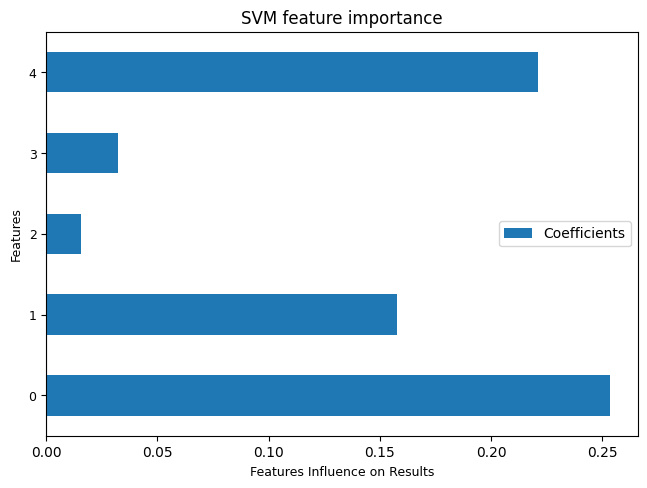

In [8]:
wuml.jupyter_print('\n\nPick out SVM and plot Feature Importance')
models['SVM'].plot_feature_importance('SVM feature importance', data.columns)